<a href="https://colab.research.google.com/github/challistarisk/Doc_Scanner/blob/main/Jobsheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1: Segmentasi Menggunakan Thresholding Global dan Otsu

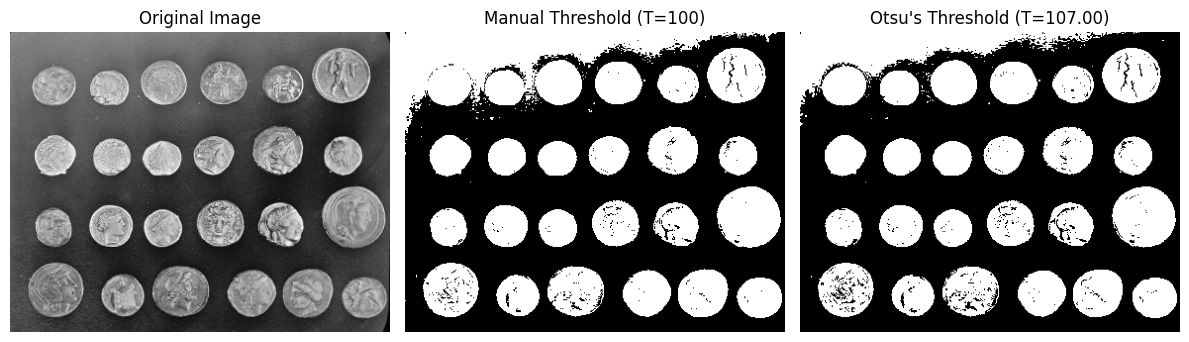

Nilai threshold Otsu yang ditemukan: 107


In [1]:
import matplotlib.pyplot as plt
from skimage import data, filters, img_as_ubyte

# Load image (grayscale)
image_coins = data.coins()

# Thresholding Global (manual)
thresh_manual = 100
binary_manual = image_coins > thresh_manual

# Thresholding Otsu
thresh_otsu = filters.threshold_otsu(image_coins)
binary_otsu = image_coins > thresh_otsu

# Visualization
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(image_coins, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_manual, cmap='gray')
ax[1].set_title(f'Manual Threshold (T={thresh_manual})')
ax[1].axis('off')

ax[2].imshow(binary_otsu, cmap='gray')
ax[2].set_title(f"Otsu's Threshold (T={thresh_otsu:.2f})")
ax[2].axis('off')

plt.tight_layout()
plt.show()
print(f"Nilai threshold Otsu yang ditemukan: {thresh_otsu}")


Praktikum 2: Segmentasi Menggunakan Region Growing (Contoh Sederhana)

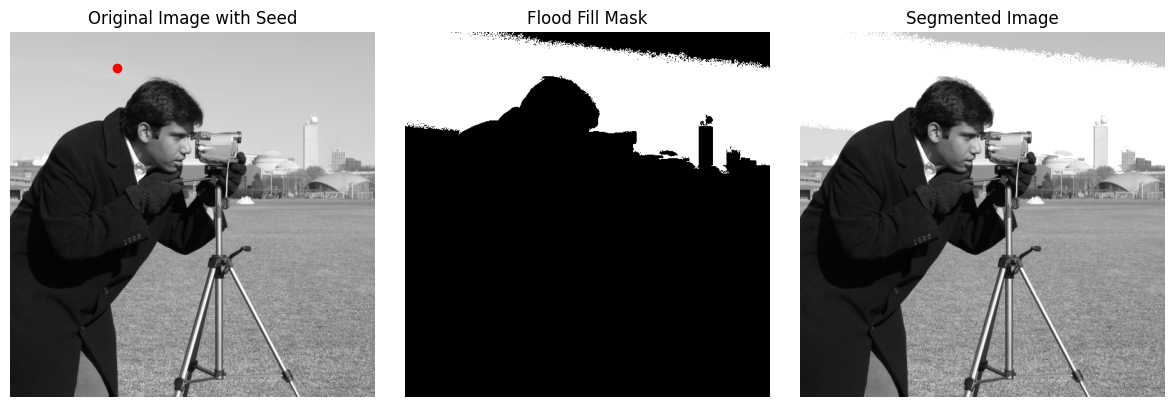

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation

# Load image
image_camera = data.camera()

# Seed point
seed_point = (50, 150)

# Region growing via flood
flood_mask = segmentation.flood(image_camera, seed_point, tolerance=10)

# Highlight region
segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255

# Visualization
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(image_camera, cmap='gray')
ax[0].plot(seed_point[1], seed_point[0], 'ro')
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap='gray')
ax[1].set_title('Flood Fill Mask')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap='gray')
ax[2].set_title('Segmented Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()


Praktikum 3: Segmentasi Citra Berwarna Menggunakan K-Means
Clustering


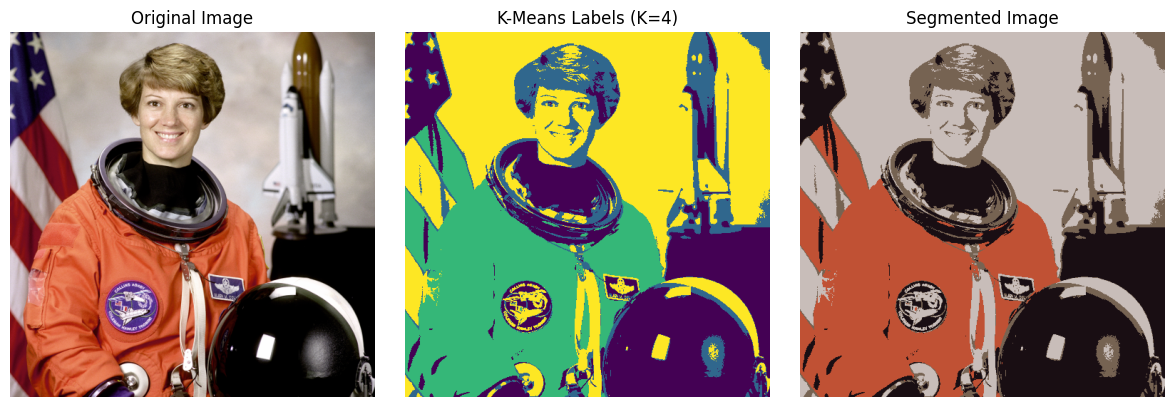

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2lab, lab2rgb
from sklearn.cluster import KMeans
import warnings

# Load image
image = data.astronaut()
image_float = image.astype(float) / 255.0

# Convert to Lab
image_lab = rgb2lab(image_float)
rows, cols, dims = image_lab.shape
pixel_features = image_lab.reshape(rows * cols, dims)

# K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)

# Label to image
segmented_labels = pixel_labels.reshape(rows, cols)

# Cluster coloring
segmented_image_kmeans = np.zeros_like(image_lab)
for k in range(n_clusters):
    mask_k = (pixel_labels == k).reshape(rows, cols)
    segmented_image_kmeans[mask_k] = kmeans.cluster_centers_[k]
segmented_image_rgb = lab2rgb(segmented_image_kmeans)

# Visualization
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmented_labels, cmap='viridis')
ax[1].set_title(f'K-Means Labels (K={n_clusters})')
ax[1].axis('off')

ax[2].imshow(segmented_image_rgb)
ax[2].set_title('Segmented Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()


Praktikum 4: Segmentasi Berbasis Tepi Menggunakan Watershed

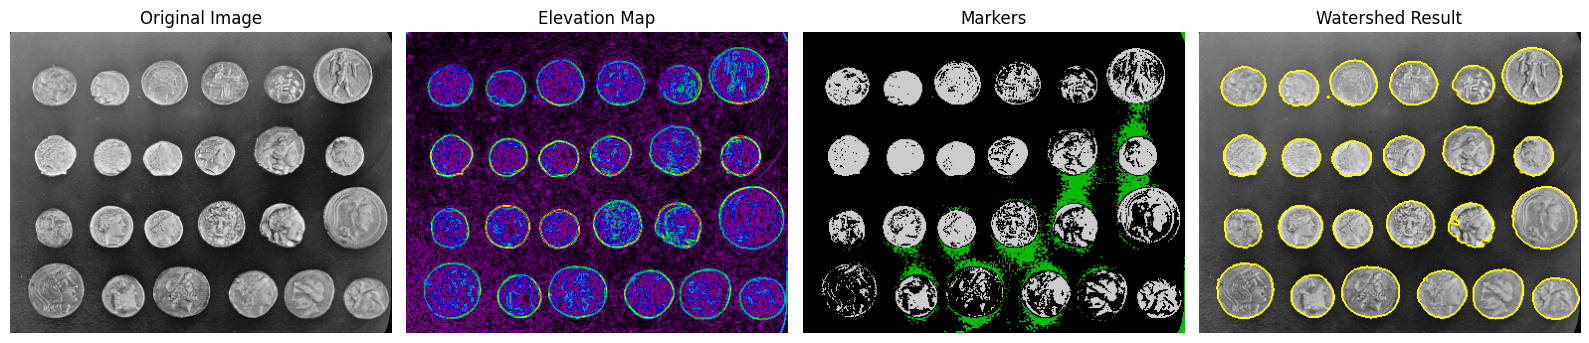

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation
from scipy import ndimage as ndi

# Load image
image = data.coins()

# Gradient (elevation)
elevation_map = filters.sobel(image)

# Markers
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2

# Watershed
labels = segmentation.watershed(elevation_map, markers)

# Mark boundaries
segmented_colored = segmentation.mark_boundaries(image, labels)

# Visualization
fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(elevation_map, cmap='nipy_spectral')
ax[1].set_title('Elevation Map')
ax[1].axis('off')

ax[2].imshow(markers, cmap='nipy_spectral')
ax[2].set_title('Markers')
ax[2].axis('off')

ax[3].imshow(segmented_colored)
ax[3].set_title('Watershed Result')
ax[3].axis('off')

plt.tight_layout()
plt.show()


Praktikum 5: Perbandingan Visual Hasil Segmentasi

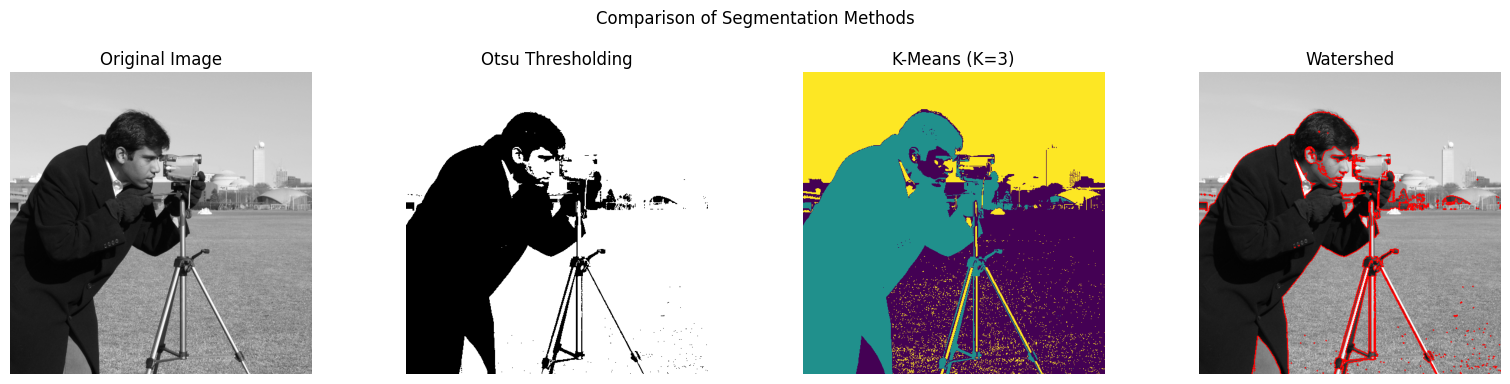

In [5]:
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, img_as_float
from sklearn.cluster import KMeans
import numpy as np
import warnings

image = data.camera()
image_float = img_as_float(image)

# Otsu
thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

# K-Means
rows, cols = image.shape
pixel_features = image_float.reshape(rows * cols, 1)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans_labels = pixel_labels.reshape(rows, cols)

# Watershed
elevation_map = filters.sobel(image)
markers = np.zeros_like(image)
markers[image < thresh_otsu] = 1
markers[image > thresh_otsu] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)
segmented_watershed_colored = segmentation.mark_boundaries(image_float, segmentation_watershed, color=(1, 0, 0))

# Plot
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap='gray')
ax[1].set_title('Otsu Thresholding')
ax[1].axis('off')

ax[2].imshow(segmented_kmeans_labels, cmap='viridis')
ax[2].set_title('K-Means (K=3)')
ax[2].axis('off')

ax[3].imshow(segmented_watershed_colored)
ax[3].set_title('Watershed')
ax[3].axis('off')

plt.suptitle('Comparison of Segmentation Methods')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Latihan 1 – Eksperimen Thresholding (Otsu vs Local vs Yen)

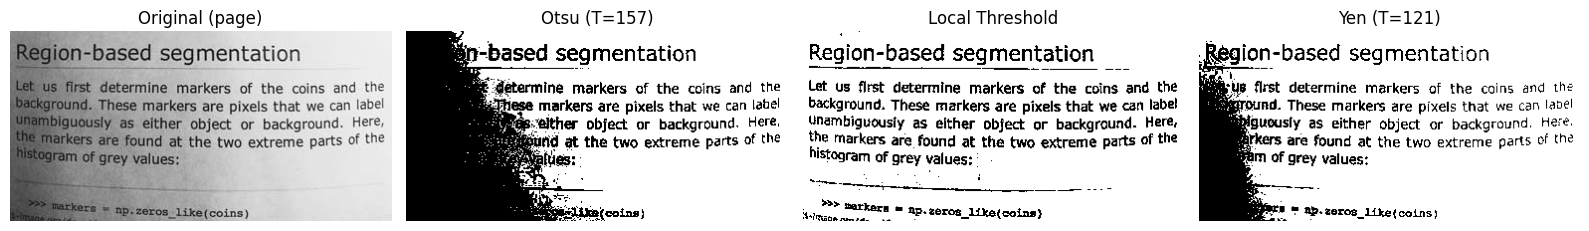

In [6]:
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage.filters import threshold_local, threshold_yen
from skimage.color import rgb2gray

# 1. Memuat citra dokumen (grayscale)
image_page = data.page()

# 2. Thresholding Otsu
thresh_otsu = filters.threshold_otsu(image_page)
binary_otsu = image_page > thresh_otsu

# 3. Thresholding Lokal
block_size = 35
local_thresh = threshold_local(image_page, block_size, offset=10)
binary_local = image_page > local_thresh

# 4. Thresholding Yen
thresh_yen = threshold_yen(image_page)
binary_yen = image_page > thresh_yen

# 5. Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_page, cmap='gray')
ax[0].set_title("Original (page)")
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap='gray')
ax[1].set_title(f"Otsu (T={thresh_otsu})")
ax[1].axis('off')

ax[2].imshow(binary_local, cmap='gray')
ax[2].set_title("Local Threshold")
ax[2].axis('off')

ax[3].imshow(binary_yen, cmap='gray')
ax[3].set_title(f"Yen (T={thresh_yen})")
ax[3].axis('off')

plt.tight_layout()
plt.show()


Latihan 2 – Segmentasi Citra Online (Otsu, K-Means, Watershed)

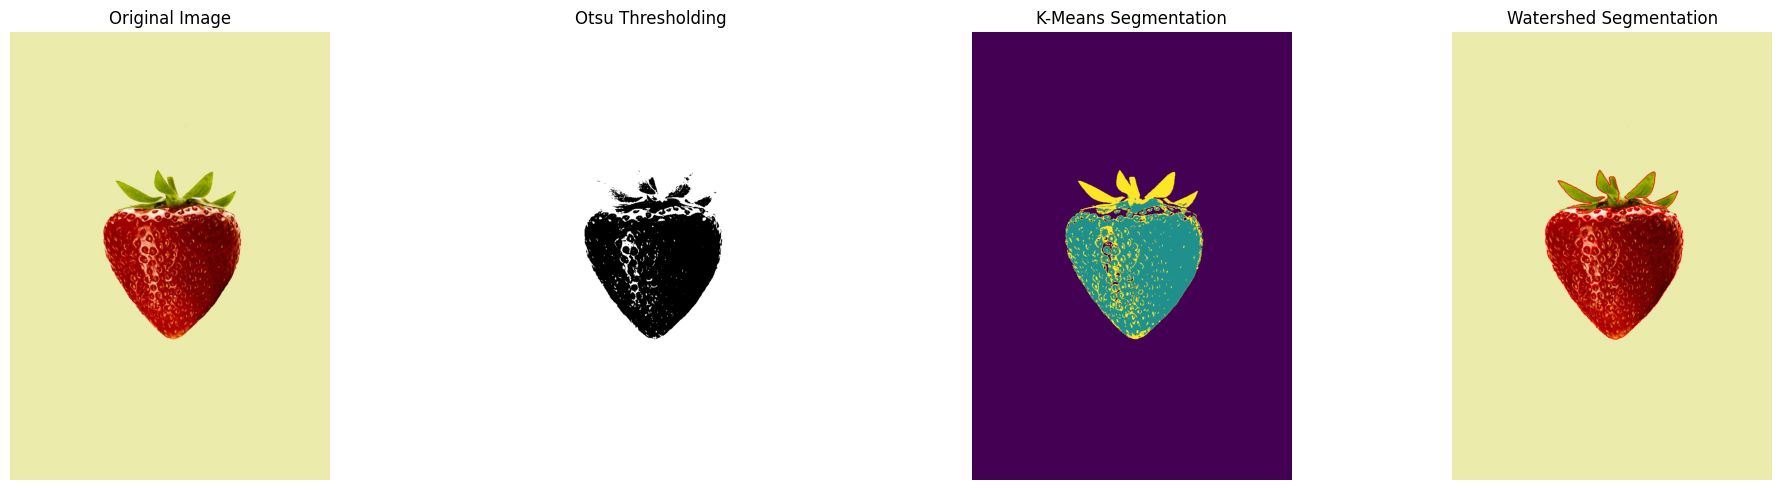

In [7]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, segmentation
from sklearn.cluster import KMeans
import numpy as np
from scipy import ndimage as ndi

# 1. Load citra dari internet (contoh: buah alpukat)
image_url = "https://images.unsplash.com/photo-1601004890684-d8cbf643f5f2?auto=format&fit=crop&w=800&q=80"
image = io.imread(image_url)
image_gray = color.rgb2gray(image)

# 2. Otsu Thresholding
thresh_otsu = filters.threshold_otsu(image_gray)
binary_otsu = image_gray > thresh_otsu

# 3. K-Means Segmentation (3 cluster)
rows, cols, ch = image.shape
pixel_features = image.reshape(rows * cols, ch)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans = pixel_labels.reshape(rows, cols)

# 4. Watershed Segmentation
elevation_map = filters.sobel(image_gray)
markers = np.zeros_like(image_gray, dtype=np.uint8)
markers[image_gray < 0.4] = 1
markers[image_gray > 0.8] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)
segmented_watershed = segmentation.mark_boundaries(image, segmentation_watershed, color=(1, 0, 0))

# 5. Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap='gray')
ax[1].set_title("Otsu Thresholding")
ax[1].axis('off')

ax[2].imshow(segmented_kmeans, cmap='viridis')
ax[2].set_title("K-Means Segmentation")
ax[2].axis('off')

ax[3].imshow(segmented_watershed)
ax[3].set_title("Watershed Segmentation")
ax[3].axis('off')

plt.tight_layout()
plt.show()
